# CQA Lasso regression model test10

11/12/2018    

delayed return  
84_Q data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import platform
platform.architecture()

('64bit', 'WindowsPE')

### import alpha library

In [2]:
# read data
#data_matrix1 = pd.read_csv('/home/system99/Downloads/data_matrix_20_Q.csv')
#data_matrix2 = pd.read_csv('/home/system99/Downloads/data_matrix_21_to_40_Q.csv')
#data_matrix3 = pd.read_csv('/home/system99/Downloads/data_matrix_41_to_60_Q.csv')
#data_matrix4 = pd.read_csv('/home/system99/Downloads/data_matrix_61_to_84_Q.csv')
data_matrix1 = pd.read_csv("C:\\Users\\tony\\Desktop\\CQA\\data\\data_matrix_20_Q.csv")
data_matrix2 = pd.read_csv("C:\\Users\\tony\\Desktop\\CQA\\data\\data_matrix_21_to_40_Q.csv")
data_matrix3 = pd.read_csv("C:\\Users\\tony\\Desktop\\CQA\\data\\data_matrix_41_to_60_Q.csv")
data_matrix4 = pd.read_csv("C:\\Users\\tony\\Desktop\\CQA\\data\\data_matrix_61_to_84_Q.csv")

In [3]:
data_matrix = pd.concat([data_matrix1,data_matrix2,data_matrix3,data_matrix4],ignore_index=True)

### monthly return

In [4]:
monthly_returns = data_matrix[['asOfDate','tic','Return']]

In [5]:
tics = data_matrix['tic']
dates = data_matrix['asOfDate']
dates = dates.apply(lambda x: x[:7])

## 1. Data preprocess

separate dates, returns (label) and alphas (data) from data matrix

In [6]:
mask = [i for i in range(14,488)]
alpha_library = data_matrix.iloc[:,mask]
alpha_library.head()

,ALPHA_77,ALPHA_267,ALPHA_505,ALPHA_572,ALPHA_25,SPPIVY,ALPHA_129,ALPHA_264,OPMBD,OPMBD1,...,IBCOMY,DOQ,DOY,IBADJQ,IBQ,IBADJY,IBY,CSH12Q,CSHPRQ,CSHPRY
0,-0.129319,0.053984,0.306399,0.346287,-0.066755,14.0,0.000000,2.028620,0.287070,0.287070,...,9705.0,0.0,0.0,3253.0,3253.0,9705.0,9705.0,905.3295,912.197,907.762
1,-0.273262,-0.003845,0.233960,-0.231986,-0.166918,-771.0,1.056310,-1.211370,0.295827,0.295827,...,5617.0,0.0,0.0,2741.0,3123.0,5331.0,6305.0,9102.1828,9956.773,9570.166
2,-0.323743,0.103459,0.204940,0.259946,1.604720,-1061.0,1.980420,-0.135714,0.300105,0.300105,...,6917.0,-3.0,208.0,2674.0,2700.0,6860.0,6917.0,23195.6250,28849.400,28646.900
3,-0.055053,0.058377,0.426733,2.559450,-0.082981,NaN,0.536183,0.816442,0.414490,0.414490,...,18760.0,0.0,0.0,4518.0,4518.0,18760.0,18760.0,8813.0000,8712.000,8813.000
4,-0.127456,0.058582,0.412080,1.127290,-0.024606,0.0,0.000000,1.159110,0.396041,0.396041,...,3795.0,0.0,0.0,1840.0,1840.0,3795.0,3795.0,317.4950,318.350,318.123


### Function1: delete columns with too many nan 
input:    
data -- dataframe;   
ratio -- threshold of (number of NA's)/(data size);
      
output:    
data -- dataframe which the ratio less than threshold ratio

In [7]:
# delete columns with too many nan
def delete_columns_with_too_many_nan(data, ratio):
    return data.loc[:,data.isnull().mean()<(ratio)]

After delete all the alpha with >0.1 NA's, the alpha library contains 464 alphas.

In [8]:
alpha_library = delete_columns_with_too_many_nan(alpha_library, 0.1)
alpha_library.shape

(252000, 474)

### Function2: replace NA's with mean in the column

In [9]:
# replace nan with mean
def replace_nan_with_mean(data):
    col_names = list(data)
    col_mean = np.nanmean(data, axis=0)
    values = {}
    for i in range(len(col_names)):
        values[col_names[i]] = col_mean[i]
    return data.fillna(values)


In [10]:
alpha_library = replace_nan_with_mean(alpha_library)

### Function3: data mask
input:   
start_year,start_quarter,train_time,delay

output:   
training data

In [11]:
def monthly_delay(start_year,start_month,delay):
    if start_month<10:
        start_time = str(start_year)+'-0'+str(start_month)
    else:
        start_time = str(start_year)+'-'+str(start_month)    
    
    response_month = start_month+delay
    if response_month>12:
        response_year = start_year+1
        response_month = response_month-12
    else:
        response_year = start_year
        
    if response_month<10:
        response_time = str(response_year)+'-0'+str(response_month)
    else:
        response_time = str(response_year)+'-'+str(response_month)
        
    return start_time,response_time


#convert from the original start year and month to one month later on for testing sample
def convert_to_test(start_year,start_month,delay):
    #normal addition process
    #if start_month <12:
    if start_month <9:
        start_yr = start_year
        #start_m = start_month +1
        start_m = start_month +delay
        
    #adding another year
    else: 
        start_yr = start_year + 1 
        #start_m = 1 
        start_m = start_month + delay - 12
    
    return start_yr, start_m 

In [12]:
def retrive_train(alpha_library,monthly_returns,dates,tics,start_year,start_month,delay):
    start_time,response_time = monthly_delay(start_year,start_month,delay)
    
    train_mask = dates == start_time
    train_alpha  = alpha_library[train_mask]
    train_tic = list(tics[train_mask])
    ##3
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    response_mask = dates == response_time
    response_return = monthly_returns['Return'][response_mask]
    response_tic = monthly_returns['tic'][response_mask]

    # create a tic-return dictionary
    response_dict = dict([(i,j) for i,j in zip(response_tic,response_return)])

    # create returns
    train_Y = np.zeros([train_alpha.shape[0],1])
    for i in range(len(train_tic)):
        if train_tic[i] in response_dict:
            train_Y[i] = response_dict[train_tic[i]]
        else:
            train_Y[i] = None
            
    train_Y = pd.DataFrame(train_Y)
    
    # filter nan in returns
    train_alpha['label'] = train_Y.values
    train_Y = train_alpha.loc[~train_alpha['label'].isnull(),'label']
    train_X = train_alpha.loc[~train_alpha['label'].isnull(),].drop(columns=['label'])

    return train_X,train_Y

In [13]:
def retrive_test(alpha_library,monthly_returns,dates,tics,start_year,start_month,delay):
    start_time,response_time = monthly_delay(start_year,start_month,delay)
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    ###
    test_mask = dates == start_time
    test_X  = alpha_library[test_mask]
    test_tic = list(tics[test_mask])

    return test_X,test_tic,response_time

## 2. Lasso regression

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import warnings
warnings.filterwarnings('ignore')

In [15]:
import os
#returns_folder = '/home/system99/dr/' 
returns_folder = "C:\\Users\\tony\\Desktop\\CQA\\data\\dr\\"
files_list = os.listdir(returns_folder)
files_list = sorted(files_list)

There are two different strategy for the portfolio management.   
(1) invest one (or negetive one) dollar every day for each company  
(2) invest one(or negetive one) dollar in the beginning of every month for each company  

The following function is based on assumption (2).

In [16]:
def portfolio_monthly_returns(date,files_list,returns_folder,returns,x):
    daily_returns = pd.DataFrame([], columns=('date','portfolio_value','portfolio_return'))
    i = 0
    for temp_file in files_list:
        if date in temp_file:
            return_temp = pd.read_csv(returns_folder+temp_file)
            return_temp = return_temp.dropna()
        
            for j in range(return_temp.shape[0]):
                if return_temp.iloc[j,0] in returns:
                    comp_tic = return_temp.iloc[j,0]
                    returns[comp_tic] = returns[comp_tic]*(1+return_temp.iloc[j,1])
            daily_returns.loc[i] = [pd.Timestamp(temp_file[:10]),x+sum(returns.values()),None]
            if i>0:
                daily_returns['portfolio_return'][i] = (daily_returns['portfolio_value'][i]-daily_returns['portfolio_value'][i-1])/daily_returns['portfolio_value'][i-1]
            else:
                daily_returns['portfolio_return'][i] = (daily_returns['portfolio_value'][i]-x)/x
            i = i+1
    month_return = (daily_returns['portfolio_value'][i-1]-x)/x

    return daily_returns,month_return 

In [17]:
from sklearn.ensemble import RandomForestClassifier

delay = 4 # delay
m = 1500 # number_of_stocks
portfolio_returns = pd.DataFrame([], columns=('date','portfolio_return'))
portfolio_daily_returns = pd.DataFrame([], columns=('date','portfolio_value','portfolio_return'))
i = 0
set_dates = list(sorted(set(dates)))
x = 1
#for k in range(len(set_dates)-delay):
#for k in range(len(set_dates)-delay-1):
for k in range(len(set_dates)-delay-delay):
    date = set_dates[i]
    start_year = int(date[:4])
    start_month = int(date[5:7])
    
    train_X,train_Y = retrive_train(alpha_library,monthly_returns,dates,tics,start_year,start_month,delay)
    #test_X,test_tic,response_time = retrive_test(alpha_library,monthly_returns,dates,tics,start_year,start_month,delay)
    ##############################################
    #roll over the relationship one period ahead
    start_y, start_m = convert_to_test(start_year,start_month,delay)
    test_X,test_tic,response_time = retrive_test(alpha_library,monthly_returns,dates,tics,start_y,start_m,delay)
    ################################################
    
    
    # Create linear regression object
    #regr_Lasso = linear_model.Lasso(alpha=.1)

    # Train the model using the training sets
    #regr_Lasso.fit(train_X, train_Y)

    # Make predictions using the testing set
    #pred_Y_Lasso = regr_Lasso.predict(test_X)
    
    # rank company by predicted returns
    #companies = test_tic
    #pred = dict(zip(companies, pred_Y_Lasso))
    #comp_ranked = sorted(pred, key=pred.__getitem__, reverse=True)
    
    # dictionary for returns
    #best_tic = comp_ranked[:m]
    #worst_tic = comp_ranked[-m:]
    #returns = {}
    #for j in best_tic:
    #    returns[j] = x/m/2
    #for j in worst_tic:
    #    returns[j] = -x/m/2
    
     #############################################################################
    
    #convert to binary return of Buy/sell
    train_Y = np.where(train_Y > np.repeat(0, len(train_Y)), "Buy","Sell")

    #create random forest object
    #rf = RandomForestRegressor()
    rf = RandomForestClassifier()
    # Train the model on training data
    rf.fit(train_X, train_Y);
    #make predictions using testing set 
    pred_Y_rf = rf.predict(test_X)
    
    #print(pred_Y_rf)    
    ################################################################################
    #long the stocks that classify as Buy, and short the stocks that classify as sell
    companies = test_tic
    pred = dict(zip(companies, pred_Y_rf))

    #################################################################################
    #equal weighted dollar neutral portfolio#
    #number of longing stocks to account for dollar-neutral
    ls = np.where(pred_Y_rf == 'Buy', 1,0)
    nl = sum(ls)
    #print(nl)
    
     #number of shorting stocks to account for dollar-neutral
    ss = np.where(pred_Y_rf == 'Sell',1,0)
    ns = sum(ss)
    #print(ns)
    
    returns = {}
    for j in companies:
        if pred[j] == 'Buy':
            returns[j] = x/nl/2
        else: 
            returns[j] = -x/ns/2
    ###################################################################################    
    
    

    
    daily_returns,portfolio_return = portfolio_monthly_returns(response_time,files_list,returns_folder,returns,x)
    print('portfolio_return for',response_time, 'is ',portfolio_return)
    
    #sharp = np.mean(daily_returns['portfolio_return'])/np.std(daily_returns['portfolio_return'])
    #print('sharp ratio for',response_time, 'is ', sharp)
    
    portfolio_daily_returns = pd.concat([portfolio_daily_returns, daily_returns], ignore_index=True)
    portfolio_returns.loc[i] = [pd.Timestamp(response_time),portfolio_return]
    i = i+1
    x = daily_returns.iloc[-1,1]

portfolio_return for 2011-05 is  -0.0013083232773444253
portfolio_return for 2011-06 is  0.012516008210386374
portfolio_return for 2011-07 is  -0.0003440896903890553
portfolio_return for 2011-08 is  0.006254891534515998
portfolio_return for 2011-09 is  0.006048892913842287
portfolio_return for 2011-10 is  0.005584013509466582
portfolio_return for 2011-11 is  0.008166898165434873
portfolio_return for 2011-12 is  -0.00031581008825218955
portfolio_return for 2012-01 is  -0.03680504901183652
portfolio_return for 2012-02 is  -0.00023896190149410443
portfolio_return for 2012-03 is  0.008205080098139738
portfolio_return for 2012-04 is  -0.002723940285071537
portfolio_return for 2012-05 is  -0.005882689379704289
portfolio_return for 2012-06 is  0.004336771136520214
portfolio_return for 2012-07 is  0.010210730131482881
portfolio_return for 2012-08 is  -0.003815807206868299
portfolio_return for 2012-09 is  0.0038860168388642684
portfolio_return for 2012-10 is  0.003387950874405332
portfolio_retu

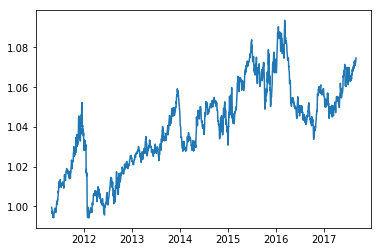

In [18]:
aggregate = [1]
for i in portfolio_daily_returns['portfolio_return']:
    aggregate.append(aggregate[-1]*(i+1))
aggregate = aggregate[1:]
plt.plot(portfolio_daily_returns['date'],aggregate)

In [19]:
portfolio_daily_returns = portfolio_daily_returns.set_index(portfolio_daily_returns['date'])

## 3. output

In [20]:
def mean_return(returns):
    return 252*np.mean(returns)*100
    
def vol(returns):
    return np.sqrt(252)*np.std(returns)*100

def sharpe_ratio(returns):
    return np.sqrt(252)*np.mean(returns)/np.std(returns)

def Sortino(returns):
    return np.sqrt(252)*np.mean(returns)/np.std(returns[returns<0])

#def draw_down(returns):
    

In [21]:
for year in range(2011,2017):
    returns = portfolio_daily_returns[str(year)+'-01-01':str(year+1)+'-01-01']['portfolio_return']
    print('year %4d, mean return = %.4f, Volatility = %.4f, sharpe ratio = %.4f, Sortino ratio = %.4f' % \
          (year,mean_return(returns),vol(returns),sharpe_ratio(returns),Sortino(returns)))

year 2011, mean return = 5.3954, Volatility = 3.3569, sharpe ratio = 1.6072, Sortino ratio = 2.3523
year 2012, mean return = -1.1774, Volatility = 3.3611, sharpe ratio = -0.3503, Sortino ratio = -0.3752
year 2013, mean return = 2.1913, Volatility = 2.1676, sharpe ratio = 1.0109, Sortino ratio = 1.4425
year 2014, mean return = -0.9860, Volatility = 2.8868, sharpe ratio = -0.3416, Sortino ratio = -0.5090
year 2015, mean return = 3.3979, Volatility = 4.2940, sharpe ratio = 0.7913, Sortino ratio = 1.1879
year 2016, mean return = -1.4295, Volatility = 3.0653, sharpe ratio = -0.4663, Sortino ratio = -0.8155


total portfolio return

In [22]:
aggregate[-1]-1

0.0747127410475743